# Exploratory Analysis

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

cmap = plt.cm.coolwarm


### Questions for each language

b'Skipping line 325621: expected 10 fields, saw 23\n'
b'Skipping line 336660: expected 10 fields, saw 74\nSkipping line 366638: expected 10 fields, saw 19\n'
b'Skipping line 455722: expected 10 fields, saw 11\n'
b'Skipping line 804123: expected 10 fields, saw 19\n'
b'Skipping line 865079: expected 10 fields, saw 12\nSkipping line 866131: expected 10 fields, saw 15\n'
b'Skipping line 341620: expected 10 fields, saw 22\n'
b'Skipping line 1293655: expected 10 fields, saw 11\n'
/Users/dhruv/virtualenvironment3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[913990, 1380390, 224057]


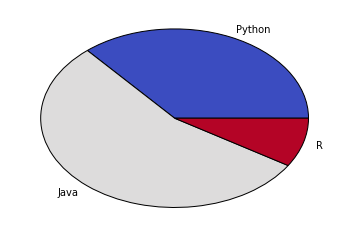

In [43]:

python_frame = pd.read_csv("python_questions.csv",encoding = 'iso-8859-1', error_bad_lines=False)
java_frame = pd.read_csv("java_questions.csv",encoding = 'iso-8859-1', error_bad_lines=False)
r_frame = pd.read_csv("r_questions.csv",encoding = 'iso-8859-1', error_bad_lines=False)


booking_split = [len(python_frame),len(java_frame),len(r_frame)]
x = ["Python","Java","R"]

colors = cmap(np.linspace(0., 1., len(booking_split)))
plt.title = "Questions"
plt.pie(booking_split,labels=x,colors=colors)
print(booking_split)

### Users Involved

In [64]:
python_frame = pd.read_csv("python_users.csv",encoding = 'iso-8859-1', error_bad_lines=False)
java_frame = pd.read_csv("java_users.csv",encoding = 'iso-8859-1', error_bad_lines=False)
r_frame = pd.read_csv("r_users.csv",encoding = 'iso-8859-1', error_bad_lines=False)

[444977, 689873, 85598]


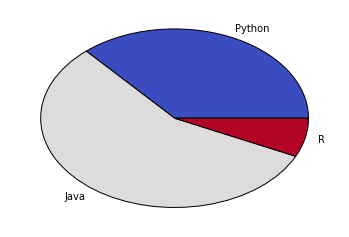

In [46]:
booking_split = [len(python_frame),len(java_frame),len(r_frame)]
x = ["Python","Java","R"]

colors = cmap(np.linspace(0., 1., len(booking_split)))
plt.title = "Questions"
plt.pie(booking_split,labels=x,colors=colors)
print(booking_split)

### Evolution of number of users

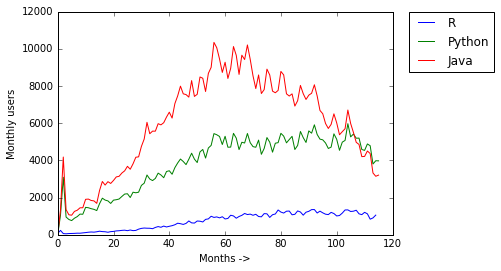

In [96]:
legend_titles = ["R","Python","Java"]
plots = []
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n



blob = []
blob_moving_average = []
for i,frame in enumerate([r_frame,python_frame,java_frame]):
    frame['CreationDate'] = pd.to_datetime(frame['CreationDate'])
    monthly_grouped = frame['CreationDate'].groupby([frame.CreationDate.dt.year, frame.CreationDate.dt.month]).agg('count')
    # print(monthly_grouped)
    x = list(monthly_grouped)
    x = x[:len(x)-1]
    y = moving_average(x)
    blob.append(x)
    blob_moving_average.append(y)

plt.subplot(111)
plt.xlabel("Months ->")
plt.ylabel("Monthly users")
plt.plot(blob[0], label="R")
plt.plot(blob[1], label="Python")
plt.plot(blob[2], label="Java")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


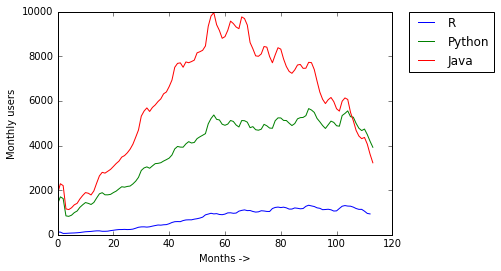

In [97]:
plt.subplot(111)
plt.xlabel("Months ->")
plt.ylabel("Monthly users")
plt.plot(blob_moving_average[0], label="R")
plt.plot(blob_moving_average[1], label="Python")
plt.plot(blob_moving_average[2], label="Java")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()